In [30]:
import pickle

In [2]:
with open("..//Data//..//Data//DeepCDR_DualGCN_combo_run_plot_from_jupyter_all_train.pickle", "rb") as f: 
    catch = pickle.load(f)

In [3]:
from scipy.optimize import curve_fit

In [4]:
from scipy.stats import norm

In [5]:
from scipy import stats

In [6]:
import matplotlib.pyplot as plt

In [7]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))

In [8]:
import numpy as np

In [135]:
# stats.probplot(catch[0][-4:][-1][:,0], dist="norm", plot=plt)
# plt.show()

In [9]:
with open("..//Data//DeepCDR_DualGCN_combo_run_plot_from_jupyter_test_features_and_ground_truth_all_train.pickle", "rb") as f: 
    current_test = pickle.load( f)

In [11]:
# current_test[-1]

In [12]:
# best_test_preds, best_li, best_ui, best_residuals

In [10]:
y_test = current_test[-1]

In [11]:
add_preds = np.zeros((y_test.shape[0], y_test.shape[1]))
for item in catch: 
    preds = item[-4]
    add_preds+= preds

In [12]:
averaged_preds = add_preds/50

In [31]:
from sklearn.metrics import mean_squared_error

In [14]:
mse = mean_squared_error(y_test, averaged_preds)

In [15]:
np.sqrt(mse)

1.369065405340875

In [32]:
from scipy.stats import pearsonr

In [17]:
pearsonr_test = pearsonr(y_test.reshape(y_test.shape[0],), 
                                 averaged_preds.reshape(averaged_preds.shape[0],))

In [18]:
pearsonr_test.statistic

0.8754035956312187

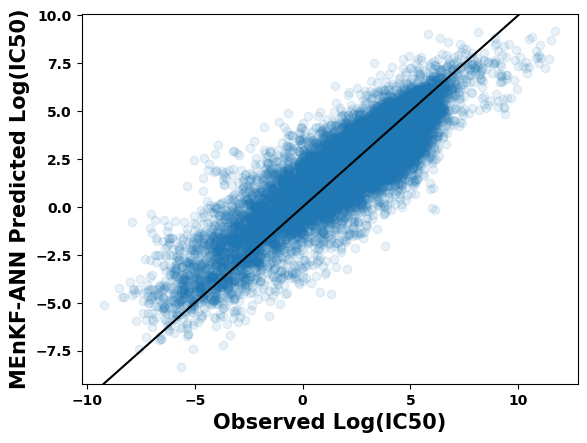

In [22]:
fig = plt.figure()
plt.scatter(y_test, averaged_preds, alpha = 0.1)
plt.axline((0,0), slope = 1, c = "black")
plt.xlabel("Observed Log(IC50)", fontweight = "bold",fontsize = 15)
plt.ylabel("MEnKF-ANN Predicted Log(IC50)", fontweight = "bold", fontsize = 15)
plt.xticks(fontsize = 10, fontweight = "bold")
plt.yticks(fontsize = 10, fontweight = "bold")
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_Scatterplot_averaged_50_all_train.pdf', bbox_inches='tight', format = "pdf")
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_Scatterplot_averaged_50_all_train.png', bbox_inches='tight')
plt.show()

In [23]:
# averaged residuals
add_resids = np.zeros((y_test.shape[0], y_test.shape[1]))
for item in catch: 
    resids = item[-1]
    add_resids+= resids

In [24]:
averaged_resids = add_resids/50

In [25]:
averaged_resids

array([[ 0.5509749 ],
       [-1.59963686],
       [-2.61274946],
       ...,
       [ 0.04512742],
       [ 1.23783114],
       [-2.52412369]])

In [26]:
# gaussian(x_interval_for_fit, *popt).sum()

In [27]:
# popt

In [33]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [34]:
from scipy.stats import norm

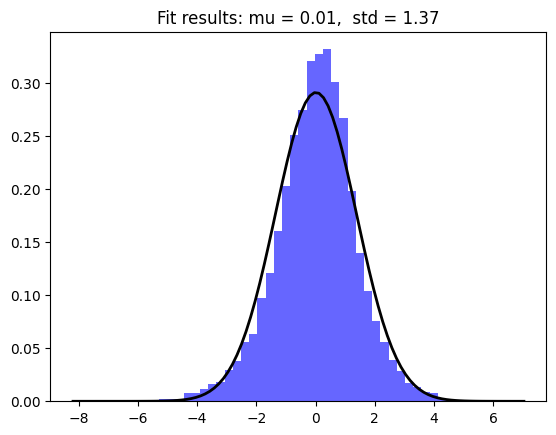

In [30]:
# Fit a normal distribution to the data:
mu, std = norm.fit(averaged_resids)

# Plot the histogram.
plt.hist(averaged_resids, bins=50, density=True, alpha=0.6, color='blue')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [31]:
sort_averaged_resids = np.sort(averaged_resids)

In [32]:
percentiles = np.arange(0, len(sort_averaged_resids))/len(sort_averaged_resids)

In [33]:
sorted_data = np.percentile(sort_averaged_resids, q = percentiles*100)

In [34]:
mu, sigma = norm.fit(averaged_resids)

In [35]:
theoretical = norm.ppf( percentiles, mu, sigma) 

In [136]:
# plt.scatter(theoretical, sorted_data)
# plt.axline((0,0), slope = 1)
# plt.show()

In [37]:
# sort_averaged_resids

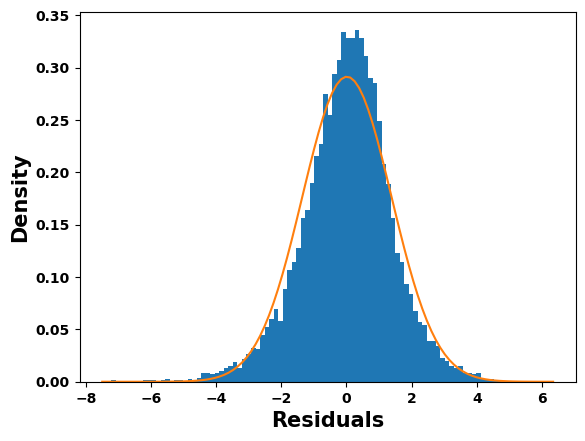

In [38]:
fig = plt.figure()
_, bins, _ = plt.hist(averaged_resids, 100, density=1)
mu, sigma = norm.fit(averaged_resids)
best_fit_line = norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
# plt.legend()
plt.xlabel("Residuals", fontweight = "bold",fontsize = 15)
plt.ylabel("Density", fontweight = "bold", fontsize = 15)
plt.xticks(fontsize = 10, fontweight = "bold")
plt.yticks(fontsize = 10, fontweight = "bold")
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_Residual_Hist_Overlay_averaged_50_all_train.pdf', bbox_inches='tight', format = "pdf")
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_Residual_Hist_Overlay_averaged_50_all_train.png', bbox_inches='tight')
plt.show()

In [39]:
np.max(averaged_resids)

6.343090030223315

In [40]:
np.min(averaged_resids)

-7.498713384311644

In [41]:
norm.cdf(np.max(averaged_resids), mu, sigma) - norm.cdf(np.min(averaged_resids), mu, sigma)

0.9999980941567385

In [42]:
# popt

In [43]:
# fig = plt.figure()
# bin_heights, bin_borders, _ = plt.hist(averaged_resids, bins='auto', label='histogram')
# bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
# popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

# x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
# plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit')
# plt.legend()
# plt.xlabel("Residuals", fontweight = "bold",fontsize = 15)
# plt.ylabel("Frequency", fontweight = "bold", fontsize = 15)
# plt.xticks(fontsize = 10, fontweight = "bold")
# plt.yticks(fontsize = 10, fontweight = "bold")
# fig.savefig('MEnKF_DeepCDR_DualGCN_Residual_Hist_Overlay_averaged_50.pdf', bbox_inches='tight', format = "pdf")
# fig.savefig('MEnKF_DeepCDR_DualGCN_Residual_Hist_Overlay_averaged_50.png', bbox_inches='tight')
# plt.show()

In [44]:
# fig = plt.figure()
# stats.probplot(averaged_resids[:,0], dist="norm", plot=plt)
# plt.xlabel("Theoretical Quantiles", fontweight = "bold",fontsize = 15)
# plt.ylabel("Ordered Values", fontweight = "bold", fontsize = 15)
# plt.xticks(fontsize = 10, fontweight = "bold")
# plt.yticks(fontsize = 10, fontweight = "bold")
# plt.title("")
# fig.savefig('MEnKF_DeepCDR_DualGCN_QQ_Plot_averaged_50.pdf', bbox_inches='tight', format = "pdf")
# fig.savefig('MEnKF_DeepCDR_DualGCN_QQ_Plot_averaged_50.png', bbox_inches='tight')
# plt.show()

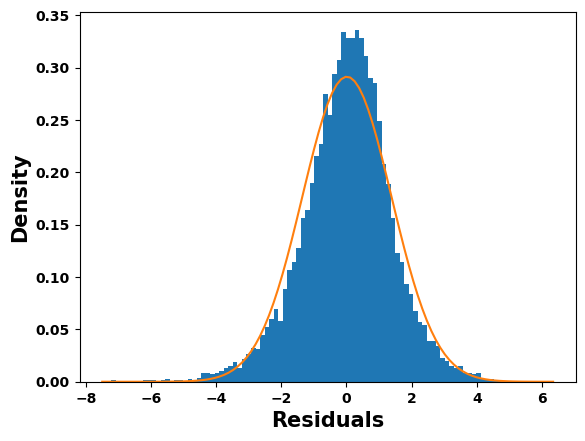

In [45]:
_, bins, _ = plt.hist(averaged_resids, 100, density=1)
mu, sigma = norm.fit(averaged_resids)
best_fit_line = norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
# plt.legend()
plt.xlabel("Residuals", fontweight = "bold",fontsize = 15)
plt.ylabel("Density", fontweight = "bold", fontsize = 15)
plt.xticks(fontsize = 10, fontweight = "bold")
plt.yticks(fontsize = 10, fontweight = "bold")
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_Residual_Hist_Overlay_averaged_50_all_train.pdf', bbox_inches='tight', format = "pdf")
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_Residual_Hist_Overlay_averaged_50_all_train.png', bbox_inches='tight')
plt.show()

In [137]:
# fig, axs = plt.subplots(1, 2,figsize=(15, 5))
# # fig, axs = plt.subplots(4, 2)
# axs = axs.ravel()
# axs[0].hist(averaged_resids, 100, density=1)
# mu, sigma = norm.fit(averaged_resids)
# best_fit_line = norm.pdf(bins, mu, sigma)
# axs[0].plot(bins, best_fit_line,linewidth = 3, c  ="green")
# axs[1].scatter(theoretical, sorted_data,s = 50)
# axs[1].axline((0,0), slope = 1, c  ="green", linewidth = 3)

# plt.setp(axs[0].get_xticklabels(), fontsize=14, fontweight="bold"
#         )
    
# plt.setp(axs[0].get_yticklabels(), fontsize=14, fontweight="bold")
# plt.setp(axs[1].get_xticklabels(), fontsize=14, fontweight="bold"
#         )
# plt.setp(axs[1].get_yticklabels(), fontsize=14, fontweight="bold")
    
# # plt.setp(axs[1].get_yticklabels(), fontsize=14, fontweight="bold")
# axs[0].set(xlabel="Residuals", ylabel="Density")
# axs[1].set(xlabel="Theoretical Quantiles", ylabel="Ordered Residuals")
# axs[0].xaxis.label.set(fontsize=14, fontweight="bold")
# axs[1].xaxis.label.set(fontsize=14, fontweight="bold")
# axs[0].yaxis.label.set(fontsize=14, fontweight="bold")
# axs[1].yaxis.label.set(fontsize=14, fontweight="bold")
# fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_QQ_HistPlot_averaged_50_all_train.pdf', bbox_inches='tight', format = "pdf")
# fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_QQ_HistPlot_averaged_50_all_train.png', bbox_inches='tight')
# plt.show()

In [35]:
import pandas as pd

In [48]:
catch_dfs = []
for item in catch: 
    item1 = item[-12:-8]
    DeepCDR_Drugs, DeepCDR_Omics, DualGCN_Drugs, DualGCN_Omics = np.array(item1[0])[:,0], np.array(item1[1])[:,0], np.array(item1[2])[:,0], np.array(item1[3])[:,0]
    combo = np.hstack((DeepCDR_Drugs.reshape(-1,1), DeepCDR_Omics.reshape(-1,1), DualGCN_Drugs.reshape(-1,1), DualGCN_Omics.reshape(-1,1)))
    combo_df = pd.DataFrame(combo)
    combo_df.columns = ["DeepCDR_Drugs", "DeepCDR_Omics", "DualGCN_Drugs", "DualGCN_Omics"]
    combo_df["update_iteration"] = np.array(list(range(0, combo_df.shape[0]))) + 1
    catch_dfs.append(combo_df)

In [49]:
catch_dfs_df = pd.concat(catch_dfs)

In [50]:
catch_dfs_df.shape

(3221, 5)

In [51]:
how_often_at_each_update  = catch_dfs_df.groupby("update_iteration")[["DeepCDR_Drugs"]].count()

In [52]:
how_often_at_each_update.columns = ["counts"]

In [53]:
how_often_at_each_update = how_often_at_each_update.reset_index()

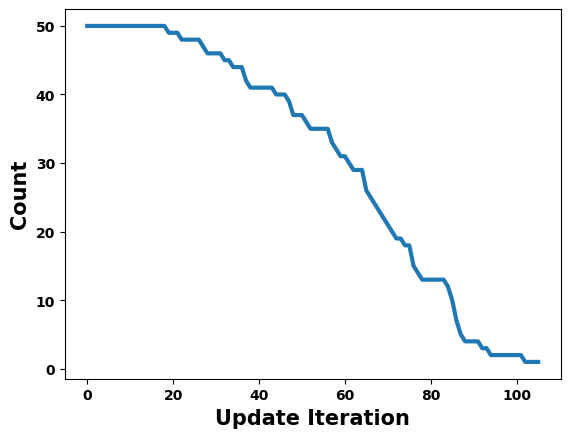

In [54]:
fig = plt.figure()
plt.plot(how_often_at_each_update["counts"], linewidth = 3)
plt.xlabel("Update Iteration", fontsize = 15, fontweight = "bold")
plt.ylabel("Count", fontsize = 15, fontweight = "bold")
plt.xticks( fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_Update_Iterations_averaged_50_all_train.pdf', bbox_inches='tight', format = "pdf")
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_Update_Iterations_averaged_50_all_train.png', bbox_inches='tight')
plt.show()

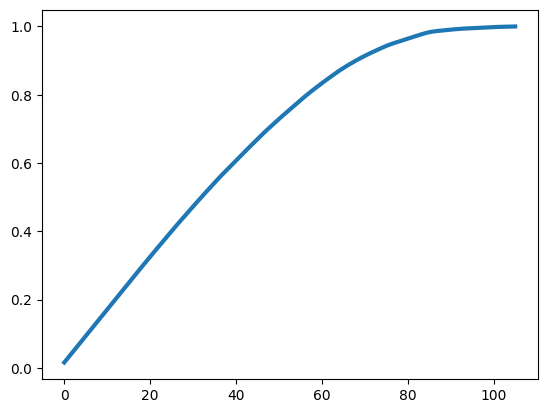

In [55]:
plt.plot(np.cumsum(how_often_at_each_update["counts"].values)/how_often_at_each_update["counts"].values.sum() , linewidth = 3)

In [56]:
# plt.hist()

In [57]:
# mean_weights_at_each_update.sum(1)

In [58]:
# mean_weights_at_each_update

In [59]:
# how_many = how_often_at_each_update.shape[0]
how_many = 60

In [60]:
mean_weights_at_each_update  = catch_dfs_df.groupby("update_iteration").mean()
mean_weights_at_each_update = mean_weights_at_each_update.reset_index()

In [61]:
mean_weights_at_each_update = mean_weights_at_each_update[mean_weights_at_each_update["update_iteration"] <= how_many]

In [62]:
mean_weights_at_each_update = mean_weights_at_each_update.set_index("update_iteration")

In [63]:
std_weights_at_each_update = catch_dfs_df.groupby("update_iteration").std()
std_weights_at_each_update = std_weights_at_each_update.reset_index()

In [64]:
std_weights_at_each_update = std_weights_at_each_update[std_weights_at_each_update["update_iteration"] <= how_many]

In [65]:
std_weights_at_each_update.shape

(60, 5)

In [66]:
# std_weights_at_each_update = std_weights_at_each_update.reset_index()

In [67]:
std_weights_at_each_update = std_weights_at_each_update.set_index("update_iteration")

In [68]:
len_updates = mean_weights_at_each_update.shape[0]

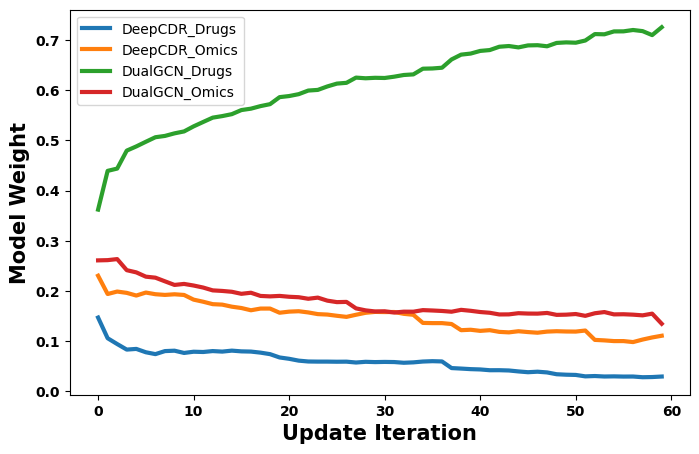

In [69]:
fig = plt.figure(figsize=(8, 5))
plt.plot(range(0,len_updates), mean_weights_at_each_update.iloc[:,0], 
            label = "DeepCDR_Drugs", linewidth = 3)

plt.plot(range(0,len_updates),  mean_weights_at_each_update.iloc[:,1], 
            label = "DeepCDR_Omics", linewidth = 3)

plt.plot(range(0,len_updates),  mean_weights_at_each_update.iloc[:,2], 
            label = "DualGCN_Drugs", linewidth = 3)

plt.plot(range(0,len_updates),  mean_weights_at_each_update.iloc[:,3],  
            label = "DualGCN_Omics", linewidth = 3)

plt.xlabel("Update Iteration", fontsize = 15, fontweight = "bold")
plt.ylabel("Model Weight", fontsize = 15, fontweight = "bold")
plt.xticks( fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")

plt.legend()
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_Weight_Trajectories_averaged_50_all_train.pdf', bbox_inches='tight', format = "pdf")
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_Weight_Trajectories_averaged_50_all_train.png', bbox_inches='tight')

plt.show()

In [70]:
# std_weights_at_each_update

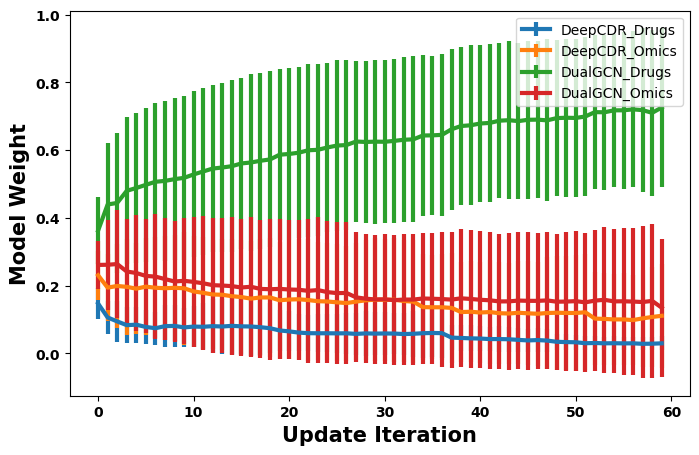

In [71]:
fig = plt.figure(figsize=(8, 5))
plt.errorbar(range(0,len_updates), mean_weights_at_each_update.iloc[:,0], yerr=std_weights_at_each_update.iloc[:,0], 
            label = "DeepCDR_Drugs", linewidth = 3)

plt.errorbar(range(0,len_updates),  mean_weights_at_each_update.iloc[:,1], yerr=std_weights_at_each_update.iloc[:,1], 
            label = "DeepCDR_Omics", linewidth = 3)

plt.errorbar(range(0,len_updates),  mean_weights_at_each_update.iloc[:,2], yerr=std_weights_at_each_update.iloc[:,2], 
            label = "DualGCN_Drugs", linewidth = 3)

plt.errorbar(range(0,len_updates),  mean_weights_at_each_update.iloc[:,3], yerr=std_weights_at_each_update.iloc[:,3], 
            label = "DualGCN_Omics", linewidth = 3)

plt.xlabel("Update Iteration", fontsize = 15, fontweight = "bold")
plt.ylabel("Model Weight", fontsize = 15, fontweight = "bold")
plt.xticks( fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")

plt.legend()
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories.pdf', bbox_inches='tight', format = "pdf")
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories.png', bbox_inches='tight')

plt.show()

In [72]:
# item1[1]

In [73]:
# combo

In [74]:
catch_dfs_rmse = []
for item in catch: 
    item1 = item[8:10]
    train_rmse = np.array(item1[0]).reshape(-1,1)
    test_rmse = np.array(item1[1]).reshape(-1,1)
    # DeepCDR_Drugs, DeepCDR_Omics, DualGCN_Drugs, DualGCN_Omics = np.array(item1[0])[:,0], np.array(item1[1])[:,0], np.array(item1[2])[:,0], np.array(item1[3])[:,0]
    combo = np.hstack((train_rmse, test_rmse))
    combo_df = pd.DataFrame(combo)
    combo_df.columns = ["Train_RMSE", "Test_RMSE"]
    combo_df["update_iteration"] = np.array(list(range(0, combo_df.shape[0]))) + 1
    catch_dfs_rmse.append(combo_df)

In [75]:
catch_dfs_rmse_df = pd.concat(catch_dfs_rmse)

In [76]:
rmse_at_each_update  = catch_dfs_rmse_df.groupby("update_iteration").mean()
rmse_at_each_update = rmse_at_each_update.reset_index()

In [77]:
rmse_at_each_update = rmse_at_each_update[rmse_at_each_update["update_iteration"] <= how_many]

In [78]:
rmse_at_each_update = rmse_at_each_update.set_index("update_iteration")

In [79]:
std_weights_at_each_update = catch_dfs_rmse_df.groupby("update_iteration").std()
std_weights_at_each_update = std_weights_at_each_update.reset_index()

In [80]:
std_weights_at_each_update = std_weights_at_each_update[std_weights_at_each_update["update_iteration"] <= how_many]

In [81]:
std_weights_at_each_update = std_weights_at_each_update.set_index("update_iteration")

In [82]:
# fig = plt.figure(figsize=(8, 5))
# plt.plot(range(0,len_updates), rmse_at_each_update.iloc[:,0], 
#             label = "Train RMSE", linewidth = 3)

# plt.plot(range(0,len_updates),  rmse_at_each_update.iloc[:,1], 
#             label = "Test RMSE", linewidth = 3)


# plt.xlabel("Update Iteration", fontsize = 15, fontweight = "bold")
# plt.ylabel("RMSE", fontsize = 15, fontweight = "bold")
# plt.xticks( fontsize = 10, fontweight = "bold")
# plt.yticks( fontsize = 10, fontweight = "bold")

# plt.legend()
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories_all_train.pdf', bbox_inches='tight', format = "pdf")
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories_all_train.png', bbox_inches='tight')

# plt.show()

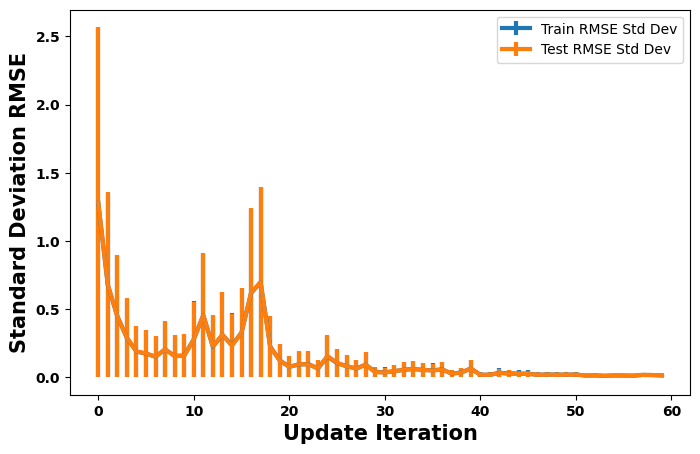

In [83]:
fig = plt.figure(figsize=(8, 5))
plt.errorbar(range(0,len_updates), std_weights_at_each_update.iloc[:,0], yerr=std_weights_at_each_update.iloc[:,0], 
            label = "Train RMSE Std Dev", linewidth = 3)

plt.errorbar(range(0,len_updates),  std_weights_at_each_update.iloc[:,1], yerr=std_weights_at_each_update.iloc[:,1], 
            label = "Test RMSE Std Dev", linewidth = 3)


plt.xlabel("Update Iteration", fontsize = 15, fontweight = "bold")
plt.ylabel("Standard Deviation RMSE", fontsize = 15, fontweight = "bold")
plt.xticks( fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")

plt.legend()
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories.pdf', bbox_inches='tight', format = "pdf")
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories.png', bbox_inches='tight')

plt.show()

In [84]:
# rmse_at_each_update.iloc[:,0]

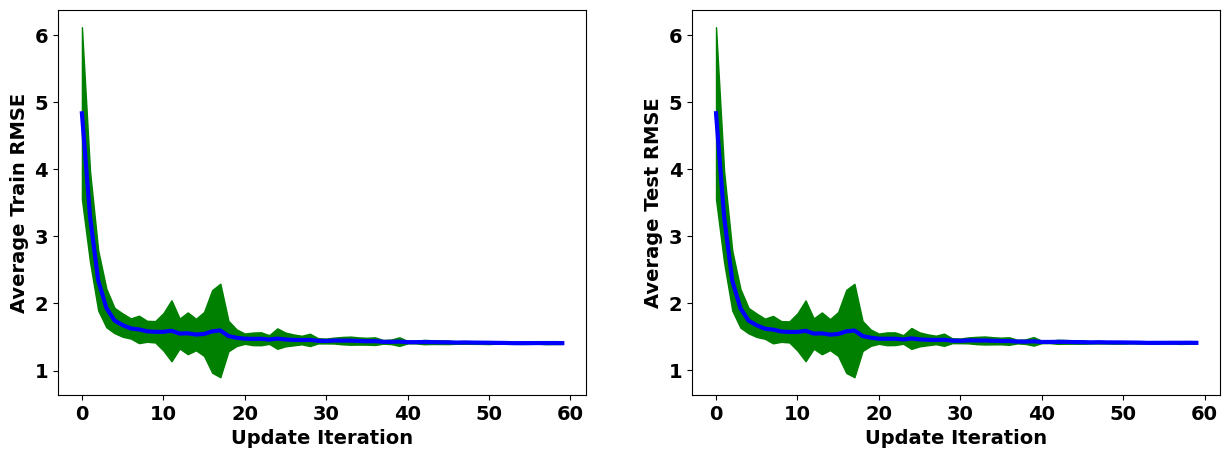

In [85]:
fig, axs = plt.subplots(1, 2,figsize=(15, 5))
# fig, axs = plt.subplots(4, 2)
axs = axs.ravel()
axs[0].plot(range(0,len_updates), rmse_at_each_update.iloc[:,0], linewidth = 3,  c = "blue", label = "Train")
axs[0].fill_between(range(0,len_updates), rmse_at_each_update.iloc[:,0]-std_weights_at_each_update.iloc[:,0], rmse_at_each_update.iloc[:,0]+std_weights_at_each_update.iloc[:,0], color = "green")
axs[1].plot(range(0,len_updates), rmse_at_each_update.iloc[:,1],linewidth = 3, c = "blue", label = "Test")
axs[1].fill_between(range(0,len_updates), rmse_at_each_update.iloc[:,1]-std_weights_at_each_update.iloc[:,1], rmse_at_each_update.iloc[:,1]+std_weights_at_each_update.iloc[:,1], color = "green")
plt.setp(axs[0].get_xticklabels(), fontsize=14, fontweight="bold"
        )
    
plt.setp(axs[0].get_yticklabels(), fontsize=14, fontweight="bold")
plt.setp(axs[1].get_xticklabels(), fontsize=14, fontweight="bold"
        )
    
plt.setp(axs[1].get_yticklabels(), fontsize=14, fontweight="bold")
axs[0].set(xlabel="Update Iteration", ylabel="Average Train RMSE")
axs[1].set(xlabel="Update Iteration", ylabel="Average Test RMSE")
axs[0].xaxis.label.set(fontsize=14, fontweight="bold")
axs[1].xaxis.label.set(fontsize=14, fontweight="bold")
axs[0].yaxis.label.set(fontsize=14, fontweight="bold")
axs[1].yaxis.label.set(fontsize=14, fontweight="bold")
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_RMSE_Trajectories_averaged_50_all_train.pdf', bbox_inches='tight', format = "pdf")
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_RMSE_Trajectories_averaged_50_all_train.png', bbox_inches='tight')
plt.show()

In [86]:
# preds.shape

In [19]:
all_li = np.zeros((y_test.shape[0], len(catch)))
all_ui = np.zeros((y_test.shape[0], len(catch)))
for i, item in enumerate(catch): 
    preds = item[-3:-1]
    all_li[:,i] =  preds[0][:,0]
    all_ui[:,i] =  preds[1][:,0]

In [88]:
# all_li

In [20]:
y_test.shape

(17316, 1)

In [21]:
li = np.median(all_li, axis = 1).reshape(-1,1)

In [22]:
li_mean = np.mean(all_li, axis = 1).reshape(-1,1)

In [23]:
li.shape

(17316, 1)

In [24]:
ui = np.median(all_ui, axis = 1).reshape(-1,1)

In [25]:
ui_mean = np.mean(all_ui, axis = 1).reshape(-1,1)

In [26]:
combo = np.hstack((y_test, li, ui))

In [28]:
combo_mean = np.hstack((y_test, li_mean, ui_mean))

In [36]:
combo_mean_df = pd.DataFrame(combo_mean)

In [37]:
combo_mean_df.columns = ["IC50", "LI_IC50_Pred", "UI_IC50_Pred"]

In [38]:
combo_mean_df["coverage"] = (combo_mean_df["IC50"] >= combo_mean_df["LI_IC50_Pred"]) & (combo_mean_df["IC50"] <= combo_mean_df["UI_IC50_Pred"])

In [39]:
combo_mean_df["coverage"].mean()

0.9570917070917071

In [40]:
combo_mean_df["width"] = combo_mean_df["UI_IC50_Pred"]-combo_mean_df["LI_IC50_Pred"]

In [41]:
combo_mean_df["width"].mean()

5.9949303148450666

In [42]:
combo_df = pd.DataFrame(combo)

In [43]:
combo_df.columns = ["IC50", "LI_IC50_Pred", "UI_IC50_Pred"]

In [44]:
combo_df = combo_df.sort_values("IC50").reset_index(drop = True)

In [47]:
combo_df["coverage"] = (combo_df["IC50"] >= combo_df["LI_IC50_Pred"]) & (combo_df["IC50"] <= combo_df["UI_IC50_Pred"])

In [48]:
combo_df["coverage"].mean()

0.9013051513051513

In [49]:
combo_df["width"] = combo_df["UI_IC50_Pred"]-combo_df["LI_IC50_Pred"]

In [50]:
combo_df["width"].mean()

4.686744706832608

In [110]:
# combo_df

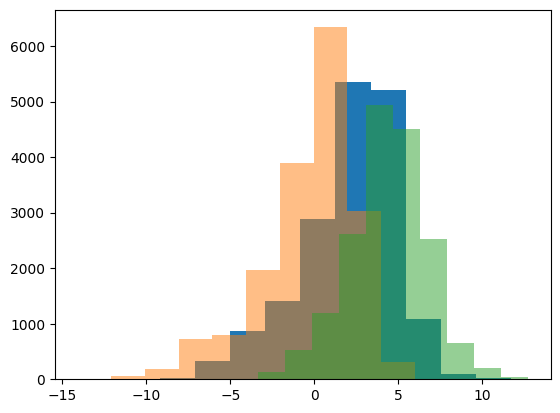

In [111]:
plt.hist(combo_df["IC50"].values)
plt.hist(combo_df["LI_IC50_Pred"].values, alpha = 0.5)
plt.hist(combo_df["UI_IC50_Pred"].values, alpha = 0.5)
plt.show()

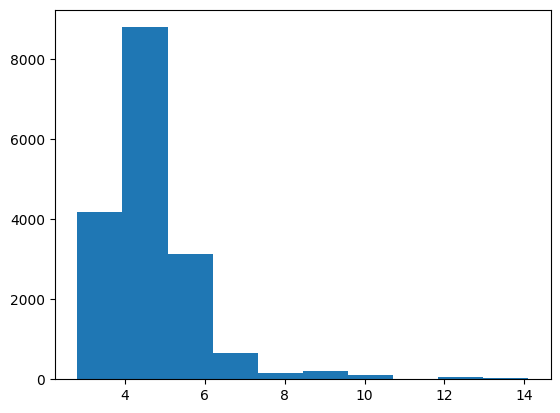

In [112]:
plt.hist(combo_df["width"].values)
plt.show()

In [51]:
np.percentile(combo_df["width"].values, 95)

6.520858843997541

In [53]:
# combo_df

In [ ]:
## select a random index 

In [59]:
combo_df.shape

(17316, 5)

In [60]:
combo_df = combo_df.sample(frac = 1.0)

In [61]:
import random

In [64]:
# select a random starting index
random_index = random.sample(range(0, combo_df.shape[0]), k = 1)[0]

In [65]:
combo_df_sys = combo_df.iloc[random_index:, :]

In [66]:
combo_df_sys.shape

(14575, 5)

In [67]:
14575//500

29

In [70]:
#  I need 500 points
indexes = list(range(0, combo_df_sys.shape[0], 29))

In [71]:
combo_df_sys = combo_df_sys.iloc[indexes, :]

In [72]:
combo_df1 = combo_df_sys

In [73]:
combo_df1 = combo_df1.sort_values("IC50").reset_index(drop = True)

In [57]:
# np.min(rmse_at_each_update.iloc[:,1])

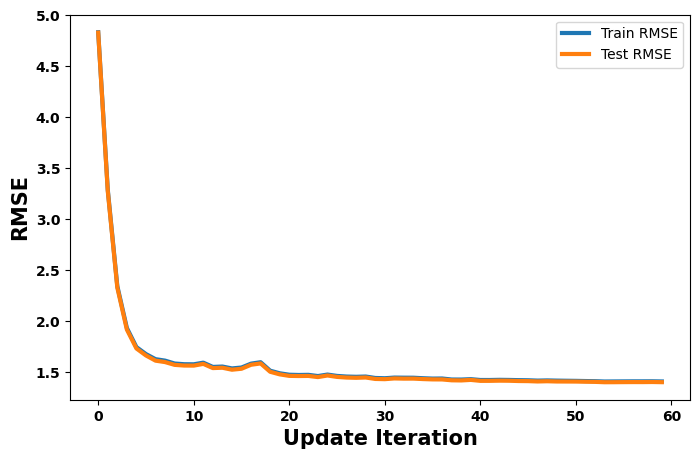

In [117]:
fig = plt.figure(figsize=(8, 5))
plt.plot(range(0,len_updates), rmse_at_each_update.iloc[:,0], 
            label = "Train RMSE", linewidth = 3)

plt.plot(range(0,len_updates),  rmse_at_each_update.iloc[:,1], 
            label = "Test RMSE", linewidth = 3)


plt.xlabel("Update Iteration", fontsize = 15, fontweight = "bold")
plt.ylabel("RMSE", fontsize = 15, fontweight = "bold")
plt.xticks( fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")

plt.legend()
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories.pdf', bbox_inches='tight', format = "pdf")
# fig.savefig('MEnKF_DeepCDR_DualGCN_Weight_Trajectories.png', bbox_inches='tight')

plt.show()

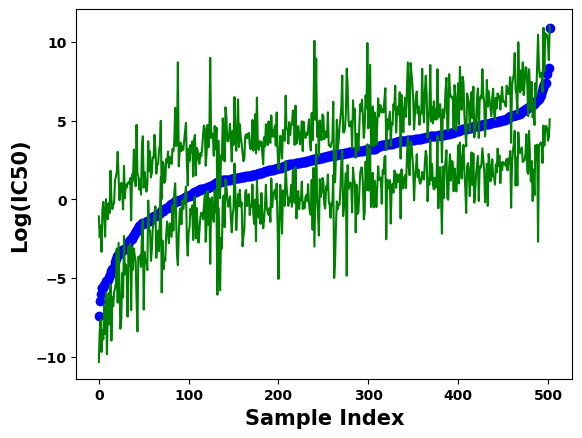

In [76]:
fig= plt.figure()
# fig, axs = plt.subplots(4, 2)
plt.scatter(range(0,combo_df1.shape[0]), combo_df1["IC50"].values,   c = "blue", label = "IC50")
plt.plot(range(0,combo_df1.shape[0]), combo_df1["LI_IC50_Pred"].values,   c = "green",
            label = "Lower Prediction Interval")
plt.plot(range(0,combo_df1.shape[0]), combo_df1["UI_IC50_Pred"].values,   c = "green",
            label = "Upper Prediction Interval")
# plt.fill_between(range(0,combo_df1.shape[0]), combo_df1["LI_IC50_Pred"].values, combo_df1["UI_IC50_Pred"].values,
#                  color = "green", label = "Empirical 95 % Prediction Interval",alpha=0.6)

plt.xlabel("Sample Index", fontsize = 15, fontweight = "bold")
plt.ylabel("Log(IC50)", fontsize = 15, fontweight = "bold")
plt.xticks( fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")
# plt.setp(axs[0].get_xticklabels(), fontsize=14, fontweight="bold"
#         )
    
# plt.setp(axs[0].get_yticklabels(), fontsize=14, fontweight="bold")
# plt.setp(axs[1].get_xticklabels(), fontsize=14, fontweight="bold"
#         )
    
# plt.setp(axs[1].get_yticklabels(), fontsize=14, fontweight="bold")
# axs[0].set(xlabel="Update Iteration", ylabel="Average Train RMSE")
# axs[1].set(xlabel="Update Iteration", ylabel="Average Test RMSE")
# axs[0].xaxis.label.set(fontsize=14, fontweight="bold")
# axs[1].xaxis.label.set(fontsize=14, fontweight="bold")
# axs[0].yaxis.label.set(fontsize=14, fontweight="bold")
# axs[1].yaxis.label.set(fontsize=14, fontweight="bold")
# plt.legend()
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_Prediction_Intervals_averaged_50_all_train_selected_500.pdf', bbox_inches='tight', format = "pdf")
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_Prediction_Intervals_averaged_50_all_train_selected_500.png', bbox_inches='tight')
plt.show()

In [119]:
# combo_df1.head()

In [120]:
# combo_df1["coverage"].mean()

In [121]:
combo_df.shape

(17316, 5)

In [122]:
combo_df2_1 = combo_df[combo_df["width"] <= 6]

In [123]:
combo_df2_2 = combo_df[combo_df["width"] >= 6]

In [124]:
combo_df2_1.shape

(15833, 5)

In [125]:
# combo_df2["width"].mean()

In [126]:
# combo_df

In [127]:
combo_df.shape

(17316, 5)

In [128]:
# !pip install moepy 

In [129]:
# from moepy import lowess

In [130]:
# lowess_model = lowess.Lowess()
# lowess_model.fit(np.array(list(range(0,combo_df.shape[0]))), combo_df["LI_IC50_Pred"].values)

# # Model prediction
# x_pred = np.linspace(0, combo_df.shape[0], combo_df.shape[0])
# y_pred = lowess_model.predict(x_pred)

In [131]:
# lowess_model = lowess.Lowess()
# lowess_model.fit(np.array(list(range(0,combo_df.shape[0]))), combo_df["UI_IC50_Pred"].values)

# # Model prediction
# x_pred = np.linspace(0, combo_df.shape[0], combo_df.shape[0])
# y_pred_u = lowess_model.predict(x_pred)

In [132]:
# plt.scatter(x_pred, y_pred,   c = "green", label = "Log(IC50)")
# plt.scatter(range(0,combo_df.shape[0]), combo_df["IC50"].values,   c = "blue", label = "Log(IC50)")
# plt.scatter(x_pred, y_pred_u,   c = "green", label = "Log(IC50)")

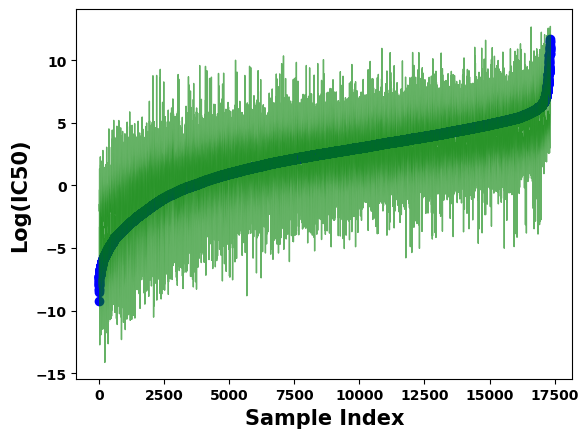

In [133]:
fig= plt.figure()
# fig, axs = plt.subplots(4, 2)
plt.scatter(range(0,combo_df.shape[0]), combo_df["IC50"].values,   c = "blue", label = "Log(IC50)")
# plt.plot(range(0,combo_df2_1.shape[0]), combo_df2_1["LI_IC50_Pred"].values, "-",  c = "green",
#             label = "Lower Prediction Interval")
# plt.plot(range(0,combo_df2_1.shape[0]), combo_df2_1["UI_IC50_Pred"].values,  "-",  c = "red",
#             label = "Upper Prediction Interval")
plt.fill_between(range(0,combo_df.shape[0]), combo_df["LI_IC50_Pred"].values, combo_df["UI_IC50_Pred"].values,
                 color = "green", label = "Empirical 95 % Prediction Interval",alpha=0.6)

plt.xlabel("Sample Index", fontsize = 15, fontweight = "bold")
plt.ylabel("Log(IC50)", fontsize = 15, fontweight = "bold")
plt.xticks( fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")
# plt.setp(axs[0].get_xticklabels(), fontsize=14, fontweight="bold"
#         )
    
# plt.setp(axs[0].get_yticklabels(), fontsize=14, fontweight="bold")
# plt.setp(axs[1].get_xticklabels(), fontsize=14, fontweight="bold"
#         )
    
# plt.setp(axs[1].get_yticklabels(), fontsize=14, fontweight="bold")
# axs[0].set(xlabel="Update Iteration", ylabel="Average Train RMSE")
# axs[1].set(xlabel="Update Iteration", ylabel="Average Test RMSE")
# axs[0].xaxis.label.set(fontsize=14, fontweight="bold")
# axs[1].xaxis.label.set(fontsize=14, fontweight="bold")
# axs[0].yaxis.label.set(fontsize=14, fontweight="bold")
# axs[1].yaxis.label.set(fontsize=14, fontweight="bold")
# plt.legend()
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_Prediction_Intervals_squished_averaged_50_all_train.pdf', bbox_inches='tight', format = "pdf")
fig.savefig('Plots/MEnKF_DeepCDR_DualGCN_Prediction_Intervals__squished_averaged_50_all_train.png', bbox_inches='tight')
plt.show()

In [134]:
# plt.scatter(list(range(0, combo_df["IC50"].shape[0])),combo_df["IC50"].values, label = "IC50")
# plt.scatter(list(range(0, combo_df["IC50"].shape[0])),combo_df["LI_IC50_Pred"].values, label = "Lower Interval IC50 MEnKF-ANN Preds")